# サンプルノートブック


In [1]:
# ライブラリを更新しながら利用する場合は，反映させるためにこれを実行する
%load_ext autoreload
%autoreload 2

In [ ]:
# リロードする場合
%reload_ext autoreload

In [10]:
import paper_plot as pplt

<class 'matplotlib.axes._subplots.AxesSubplot'>


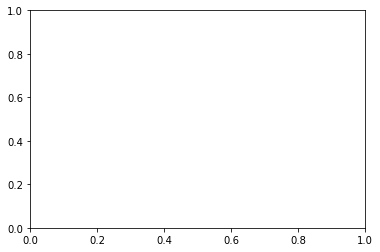

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
print(type(ax))

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

props = {
    "axes.grid": True,
    "grid.linestyle": '-',
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": False,
    "ytick.right": False,
    "xtick.bottom": True,
    "ytick.left": True,
    "axes.linewidth": 1.0,
    "axes.axisbelow": True
}

default_props = plt.rcParams.copy()
# mpl.RcParams(props)
plt.rcParams.update(props)

## 使用例1

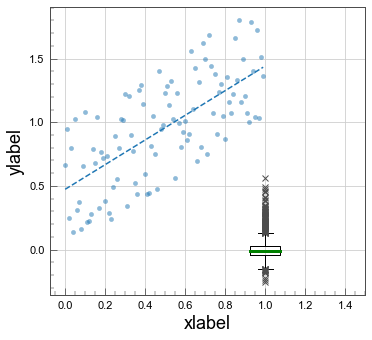

<Figure size 460.8x316.8 with 0 Axes>

In [11]:
import paper_plot as pplt
import seaborn as sns
import numpy as np

fmri = sns.load_dataset("fmri")

x = np.arange(0, 1, 0.01)
x = x.reshape(-1, 1)
y = x + 1*np.random.rand(100, 1)

fig = pplt.initialize()
ax1 = pplt.create_new_axis(fig, 111)
pplt.boxplot(ax1, fmri.signal, pattern_label=None)
pplt.regression(ax1, x, y)
pplt.scatter(ax1, x, y)
pplt.set_axes_params(fig, ax1)
pplt.display_process()

## Widgets の利用

In [11]:
%matplotlib widget
import paper_plot as pplt
import seaborn as sns
import matplotlib.ticker as ticker


import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fmri = sns.load_dataset("fmri")
fig = pplt.initialize(font_family="Arial")
ax1 = pplt.create_new_axis(fig, 111)
slider_ax1 = fig.add_axes([0.0, -0.1, 1.0, 0.1], facecolor="green")
# slider_ax1 = pplt.create_new_axis(fig, 211)
widgets_slider = Slider(slider_ax1, label=None, valmin=0, valmax=10,
                       valinit=5, valstep=1, valfmt="%d")
pplt.scatter(ax1, fmri["timepoint"], fmri["signal"])
# pplt.bar(ax1, fmri["timepoint"], fmri["signal"])
pplt.set_axes_params(
    fig, ax1,xlabel="timepoint", ylabel="signal",
    ticklabelsize=15,
#     ymaj_ticker=ticker.MultipleLocator(0.2),
#     ymaj_ticker=ticker.MaxNLocator(10),
    ymajtick_num=10,
    **{"ylim": (-1.0, 1.0)}
)
# plt.show()
# pplt.display_process()
# pp.save("sample.png")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [38]:
from datetime import datetime

import ipywidgets as widgets
from traitlets.utils.bunch import Bunch
from IPython.display import display


def show_widgets() -> widgets.VBox:
    """ウィジェットを設定する関数"""
    output = widgets.Output(layour={"border": "1px solid black"})

    button = widgets.Button(description="Click me")
    select = widgets.Select(options=["Apple", "Banana", "Cherry"])

    def on_click(clicked_button: widgets.Button) -> None:
        """ボタンが押されたときに実行されるイベントハンドラ"""
        with output:
            # スコープ内の標準出力は Output に書き出される

            # 表示エリアの内容を消去
            output.clear_output()
            print(f"Clicked at {datetime.now()}")
        return
    
    @output.capture()
    def on_value_change(change: Bunch) -> None:
        # 値が変更されたイベントを扱う
        # observe() を利用する
        if change["name"] == "value":
            output.clear_output()
            print(f"value changed: {change['old']} -> {change['new']}")
            
    @output.capture(clear_output=True)
    def on_click_deco(b: widgets.Button) -> None:
        print(f"Clicked, selected item: {select.value}")
        return
    
    select.observe(on_value_change)
    
    #display(select, button, output) #この順番で描画される
    #display をここで呼ばずに VBoxにウィジェットを入れて返す
    return widgets.VBox([select, button, output])
    
box = show_widgets()
display(box)

In [39]:
# observe() を利用すると煩雑になってしまう． ipywidgets.interactive() を使った方が見通しがよくなるとのこと
def show_widgets() -> None:
    slider = widgets.IntSlider(value=50, min=1, max=100,
                              description="slider")
    select = widgets.Select(options=["Apple", "Banana", "Cherry"])
    output = widgets.Output(layour={"border": "1px solid black"})
    
    @output.capture(clear_output=True)
    def on_value_change(select_value: str, slider_value: int) -> None:
        print(f"value changed: {select_value=}, {slider_value=}")
    
    # 複数のウィジェットの変更を一度に監視できる
    widgets.interactive(on_value_change, select_value=select, slider_value=slider)
    display(select, slider, output)

show_widgets()

Select(description='select_value', options=('Apple', 'Banana', 'Cherry'), value='Apple')

IntSlider(value=50, description='slider', min=1)

Output()

In [41]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def h(p, q):
    return (p, q)

@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

# interact(h, p=5, q=fixed(20))


interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

In [1]:
# font 設定問題
# https://qiita.com/f0o0o/items/c2f74ac1d27e48d0fed1
# https://ricrowl.hatenablog.com/entry/2020/09/14/032424

import matplotlib.font_manager as fmg
flist = fmg.get_fontconfig_fonts()
print(len(flist))
print(flist[1500])
print(fmg.FontProperties(fname=flist[1500]))
fp_source = fmg.FontProperties(fname=flist[1500])
names = [fmg.FontProperties(fname=fname).get_name() for fname in flist]
# print(names)


2261
C:/texlive/2019/texmf-dist/fonts/opentype/impallari/librebodoni/LibreBodoni-Italic.otf
sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=C\:/texlive/2019/texmf-dist/fonts/opentype/impallari/librebodoni/LibreBodoni-Italic.otf:size=10.0


findfont: Font family ['Libre Bodoni'] not found. Falling back to DejaVu Sans.


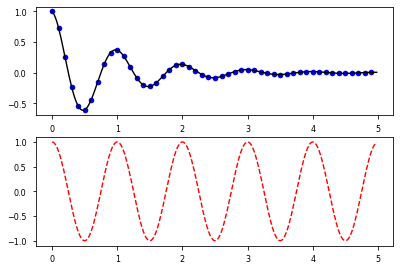

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-paper")
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# plt.rcParams["font.family"] = fp_source.get_name()

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [4]:
import paper_plot as pplt
pplt.check_setting_matplotlib("grid")

check parameters (rcParams) including 'grid' ------
axes.grid: True
axes.grid.axis: both
axes.grid.which: major
axes3d.grid: True
grid.alpha: 1.0
grid.color: #b0b0b0
grid.linestyle: -
grid.linewidth: 0.8
keymap.grid: ['g']
keymap.grid_minor: ['G']
polaraxes.grid: True
